<a href="https://colab.research.google.com/github/TristanDao/Predictive-Analysis-of-Bank-Deposits/blob/main/Final_Project_DA52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bussines problem

##Introduction
The older marketing options have contributed minimal in increasing the business of banks. Due to internal competition and financial crisis European Banks were under pressure to increase their financial assets. They offered long term deposits with good interest rates to the people using direct marketing strategy but contacting many people takes lot of time and success rate is also less.

 So they want to take help of the technology to come up with a solution that increases the efficiency by making fewer calls but improves the success rate. Banking Institution has provided the data related to marketing campaigns that took over phone calls.
##Problem statement
 One of the Portuguese banking institution conducted a marketing campaign based on phone calls. The records of their efforts are available in the form of a dataset. The objective here is to apply machine learning techniques to analyse the dataset and figure out most effective tactics that will help the bank in next campaign to persuade more customers to subscribe to banks term deposit.

Bank profitability depends on long-term deposits. Targeted marketing tactics that let customers interact with banks directly are the main focus of bank marketing.
##Summmary
Banks are required to sell more long-term bank deposits to enhance their cash reserves right ?

Bank profitability depends on long-term deposits and Marketing executives are therefore under pressure to persuade the general public to buy long-term deposits. To increase the positive response rate, marketing managers should build better use of their limited resources by making fewer calls to customers while closing more sales. Because they already contain data from prior campaigns to examine, managers may utilize data classification techniques to determine clients in near future.

The dataset class is labelled as ‘yes’ or ‘no’ depending on whether the contacted client has subscribed to the term deposit or not. It is a marketing problem and the outcome will largely influence the future strategies of bank. Banking institute has a very large client base and even larger target clients.

In real world , less clients will respond positively to marketing campaign and most of them will say no. Contacting all of them is time consuming task and demands tremendous time and efforts. To manage the human resource in efficient way, it is necessary to correctly identify those clients who have more chances of saying yes. This is where machine learning comes into picture.
##Objective
The main objective is to build a predictive model that predicts whether a new client will subscribe to a term deposit or not, based on data from previous marketing campaigns.

#Import library & Overview data

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE()

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report

##Check data

In [ ]:
link = 'https://drive.google.com/file/d/1-kIEPBnt4wnsqrfrdr8vqQ9jc--lPQBY/view?usp=sharing'
df = pd.read_csv('https://drive.google.com/uc?export=download&id='+ link.split('/')[-2])
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  object
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.3+ MB


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.duplicated().sum()*100/len(df)

19.800258989232432

In [ ]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,56373,56373,56373,56373,56373,56373,56373,56373,56373,56373
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,12024,33565,28678,55390,30411,47669,37327,16590,45285,45795


##Descriptive Statistics:
* Age: Clients range in age from 19 to 87 years, with a mean age of approximately 41 years.

* Balance: The average yearly balance is around €1422.66. The balance ranges from -€3313 to €71188.

* Duration: The average duration of the last contact is approximately 264 seconds.

* Campaign: On average, a client was contacted approximately 3 times during this campaign.

* Pdays: A significant number of clients have a value of -1 for ‘pdays’, indicating they were not contacted before this campaign.

* Previous: On average, a client was contacted approximately 0.54 times before this campaign.

##Categorical Data Insights:
* Job: The most common job category is management.

* Marital: The majority of clients are married.

* Education: Most clients have received a secondary education.

* Housing: A majority of the clients have a housing loan.

* Loan: Most clients do not have a personal loan.

* Contact: The most common communication type is ‘cellular’.

* Month: May is the month with the highest number of last contacts.

* Poutcome: The outcome of the previous campaign is mostly ‘unknown’.

* Deposit (Target Variable): The majority of clients have not subscribed to a term deposit.

##Cleaning data

In [ ]:
df.drop_duplicates(inplace = True)


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.duplicated().sum()*100/len(df)

0.0

#EDA and Visualization

In [ ]:
# describe all the numerical columns

df.describe(percentiles=[.25,.50,.75,.80,.85,.90,.95,.96,.97,.98,.99,.999])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
80%,51.000000,1859.000000,24.000000,368.000000,4.000000,-1.000000,0.000000
85%,53.000000,2539.000000,27.000000,437.000000,4.000000,102.000000,1.000000
90%,56.000000,3574.000000,28.000000,548.000000,5.000000,185.000000,2.000000


* The pdays column contains values of -1, which indicate that certain customers were not contacted previously as part of the bank's marketing campaign.

* The dataset includes a large number of new customers, as evidenced by the prevalence of 0 values in column previous, which suggest that many customers have not previously been contacted before this campaign.

* The balance column contains some negative values, which could indicate that certain customers have overdrawn on their accounts or have outstanding debts. These negative balances suggest that some customers may be experiencing financial difficulties or challenges.

* It appears that there are a small number of outliers in the balance and duration columns, as indicated by the notable gap between the values of the 99.9th percentile and the maximum values in these columns. This suggests that there may be a few extreme values that are skewing the distribution of the data in these columns.

## Outlier customers

In [ ]:
# Lets check how many customers balance is 0 or negative

df[(df['balance']<=0)].value_counts().sum()

7280

In [ ]:
# Let's check how many customers subscribed to term deposit despite having a balance of 0 or negative

df[(df['balance']<=0) & (df['deposit']=='yes')].value_counts().sum()

502

* It seems strange that there are 7280 customers with a zero or negative bank balance who also have housing loans or personal loans or credit in default. Out of these 7280 customers, 502 customers would subscribe to a term deposit.

* There is a very low percentage(6.9%) of customers with a negative or zero bank balance who subscribed to a term deposit. This could indicate that there is some error in the data or that these customers are not a good target for marketing campaigns.

=> We need to further investigate the data to determine if there are any discernible patterns.

In [ ]:
# find out the percentage of customers with a primary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(df[(df['balance']<=0) & (df['deposit']=='yes') & (df['education']=='primary')].value_counts().sum() /
          df[(df['balance']<=0) & (df['education']=='primary')].value_counts().sum()*100,2)) + '%'

'5.24%'

In [ ]:
# find out the percentage of customers with a secondary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(df[(df['balance']<=0) & (df['deposit']=='yes') & (df['education']=='secondary')].value_counts().sum() /
          df[(df['balance']<=0) & (df['education']=='secondary')].value_counts().sum()*100,2)) + '%'

'6.47%'

In [ ]:
# find out the percentage of customers with a tertiary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(df[(df['balance']<=0) & (df['deposit']=='yes') & (df['education']=='tertiary')].value_counts().sum() /
          df[(df['balance']<=0) & (df['education']=='tertiary')].value_counts().sum()*100,2)) + '%'

'9.37%'

In [ ]:
# find out the percentage of customers who student and who have subscribed to term deposit and have a non-positive bank balance.

str(round(df[(df['balance']<=0) & (df['deposit']=='yes') & (df['job']=='student')].value_counts().sum() /
          df[(df['balance']<=0) & (df['job']=='student')].value_counts().sum()*100,2)) + '%'

'18.97%'

In [ ]:
# find out the percentage of customers who retired and who have subscribed to term deposit and have a non-positive bank balance.

str(round(df[(df['balance']<=0) & (df['deposit']=='yes') & (df['job']=='retired')].value_counts().sum() /
          df[(df['balance']<=0) & (df['job']=='retired')].value_counts().sum()*100,2)) + '%'

'11.85%'

* Among customers with a non-positive bank balance those with a tertiary education have the highest percentage of subscribing to a term deposit (9.37%) followed by secondary education (18.97%) and primary education (11.85%).

* Students with a non-positive bank balance have the highest percentage of subscribing to a term deposit (18.97%) followed by retired customers (11.85%).

* Out of the total 7280 customers with a non-positive bank balance only 502 subscribed to a term deposit, indicating that the majority of customers with a non-positive bank balance did not subscribe to a term deposit.

* It may be useful to gather additional information on these customers such as their financial history and reasons for having a non-positive bank balance to gain a better understanding of their behavior and improve targeting of future marketing campaigns.

* There is no any clear relationship between any of the columns. The data is imbalanced and does not make sense. Negative or zero bank balance and outstanding loans make it unlikely for customers to subscribe to term deposits. Therefore, we consider this a type of outlier.

=> I decided to drop the 502 values of customers with a non-positive bank balance who subscribed to term deposits to eliminate outliers. This action is taken based on real time scinario because this is not make sense right ? which will save man-hours and resources while yielding more accurate predictions.

In [ ]:
# Dropping unnecessary rows

df = df.drop(df[(df['balance']<=0) & (df['deposit']=='yes')].index)

##Univariate and Bivariate analysis of catagorical variables

<ipython-input-19-75644860d364>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'deposit', data = df, palette = custom_palette)


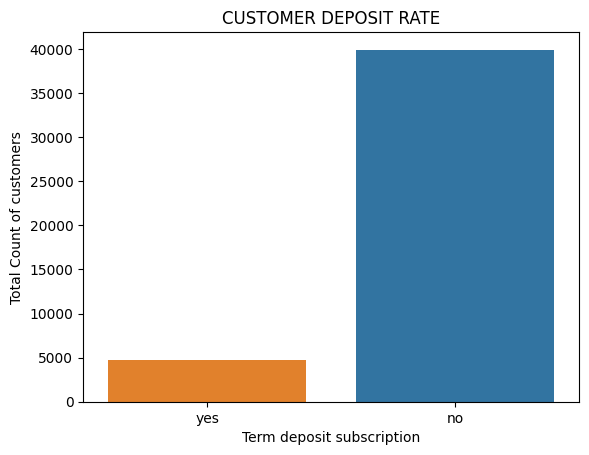

In [ ]:
custom_palette = ['#ff7f0e','#1f77b4']
sns.countplot(x = 'deposit', data = df, palette = custom_palette)
plt.ylabel('Total Count of customers')
plt.xlabel('Term deposit subscription')
plt.title('CUSTOMER DEPOSIT RATE')
plt.show()


* The ratio of non-subscribed to subscribed customers is 88:12 indicating that the bank invested a considerable amount of time, resources, and manpower without generating the desired outcome. To overcome this issue we build a predictive model that can efficiently identify potential customers likely to subscribe to the term deposit,saving time and resources.

* The data is also imbalanced, which can impact the accuracy of the predictive model. we implementing various techniques in feature engineering to balance the dataset and improve model performance.

In [ ]:
print(df.select_dtypes(include = 'object').columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


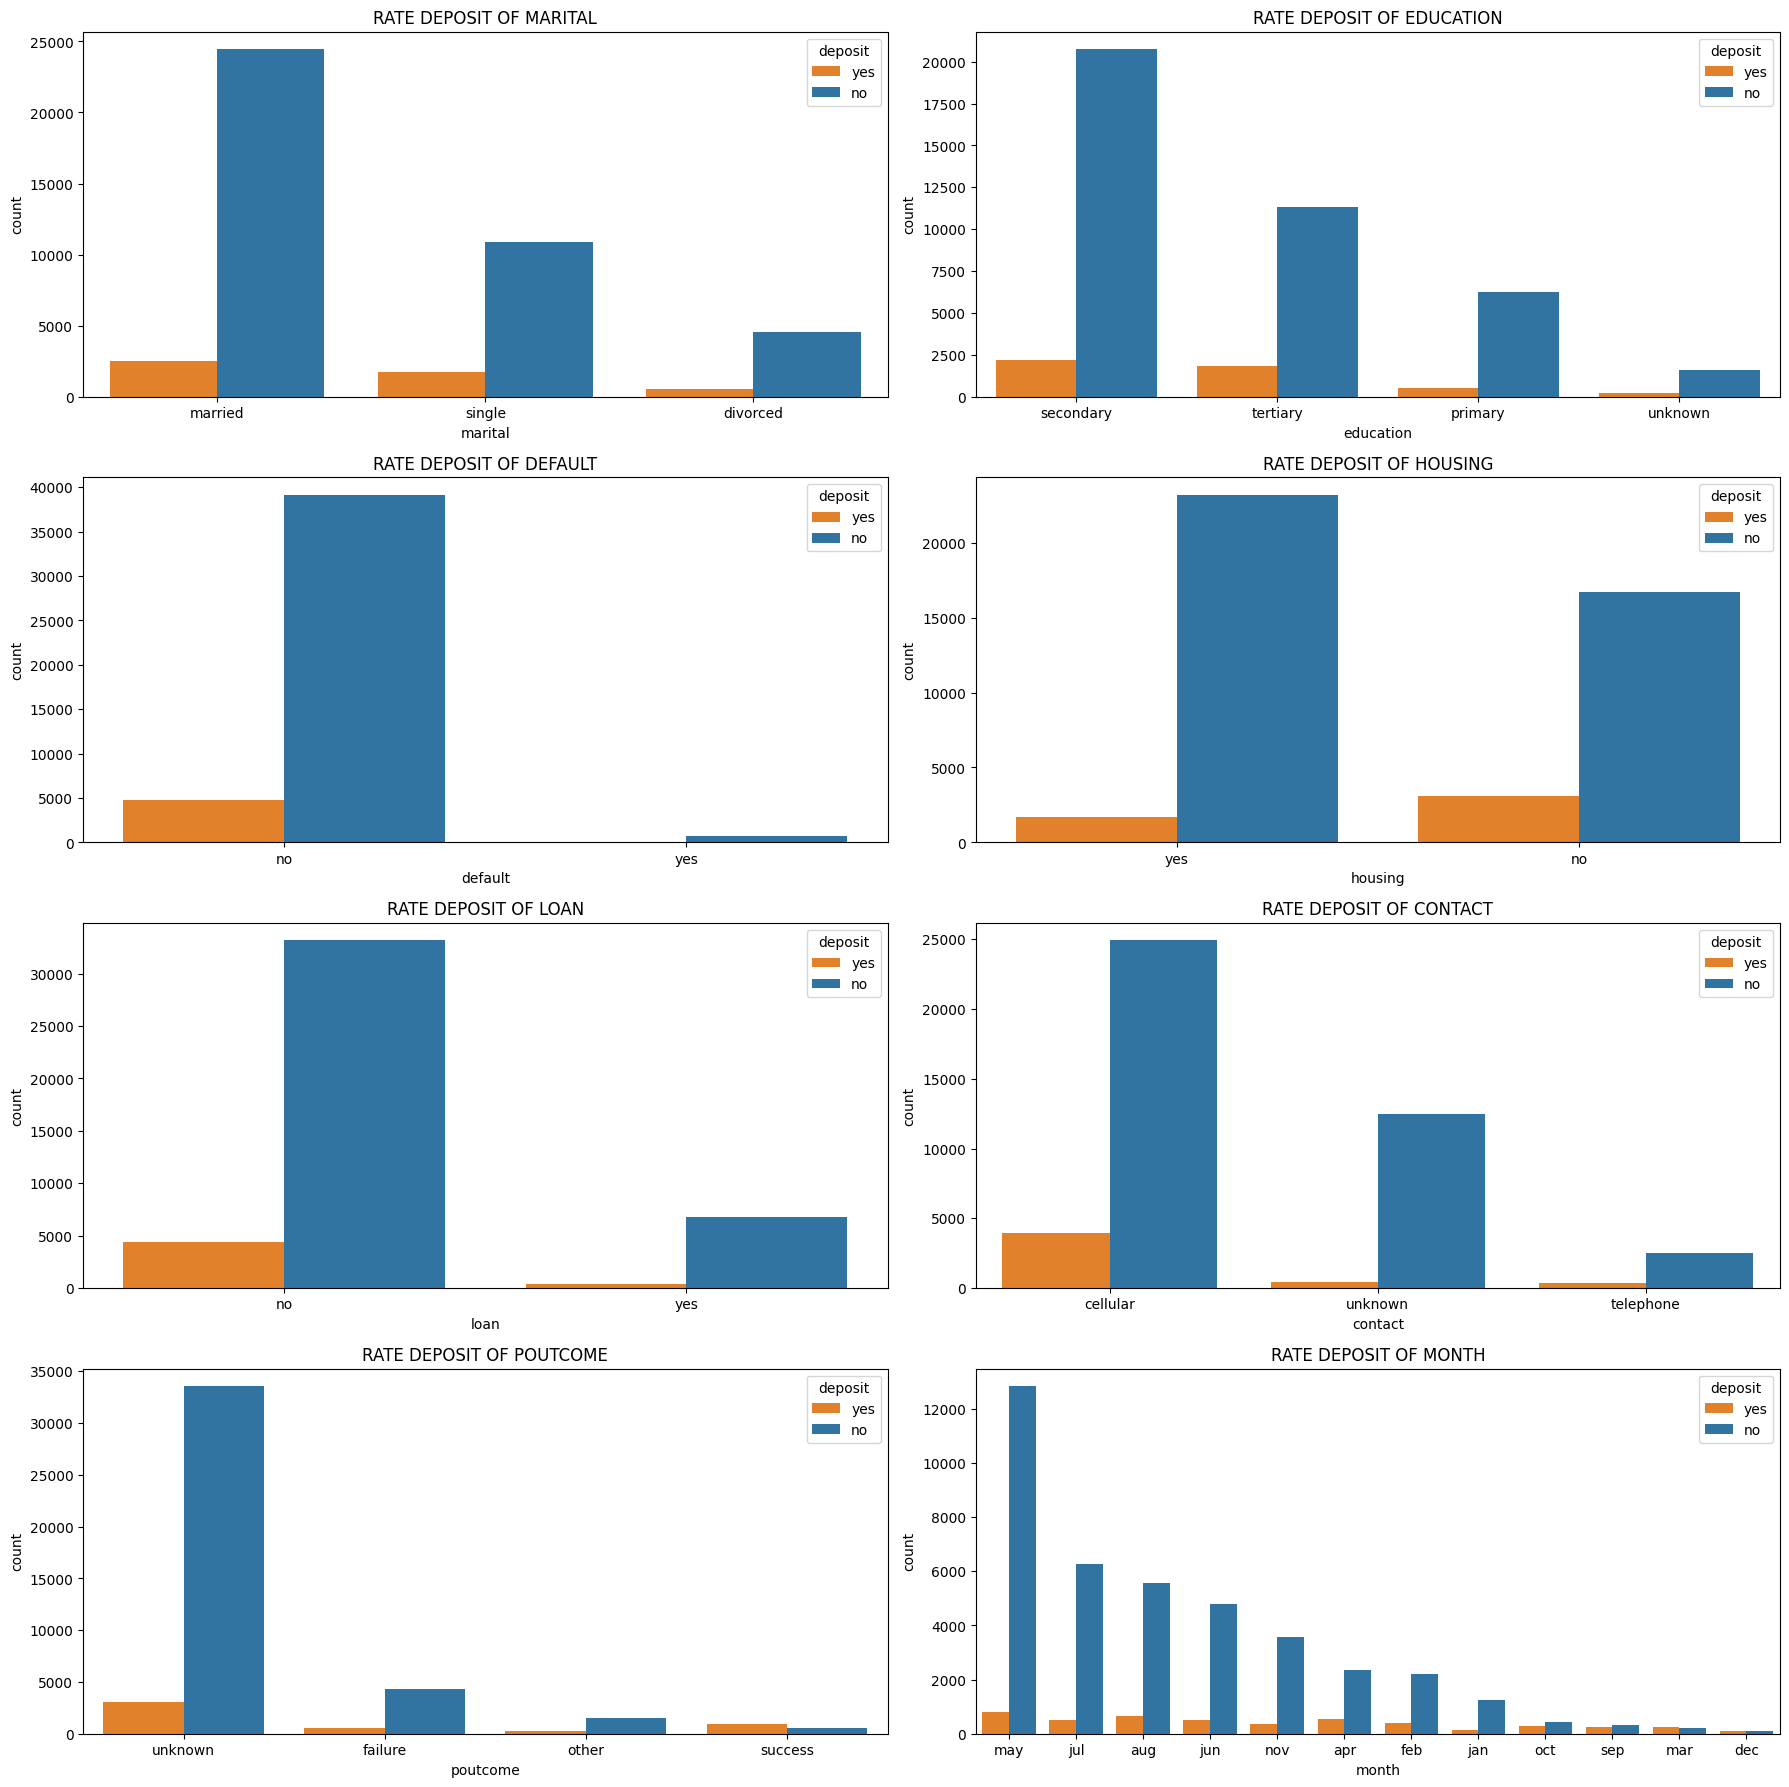

In [ ]:
# bivariate analysis of remaining categorical variables and target column y(term deposit)

categorical = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome','month']
custom_palette = ['#ff7f0e', '#1f77b4']

plt.figure(figsize=(18,22))
n = 1
for column in categorical:
  ax = plt.subplot(5,2,n)
  sns.countplot(x = column, hue='deposit', data=df, order=df[column].value_counts().index,palette=custom_palette)
  plt.xlabel(column)
  plt.title('RATE DEPOSIT OF '+ column.upper())
  plt.tight_layout()
  n += 1
plt.show()

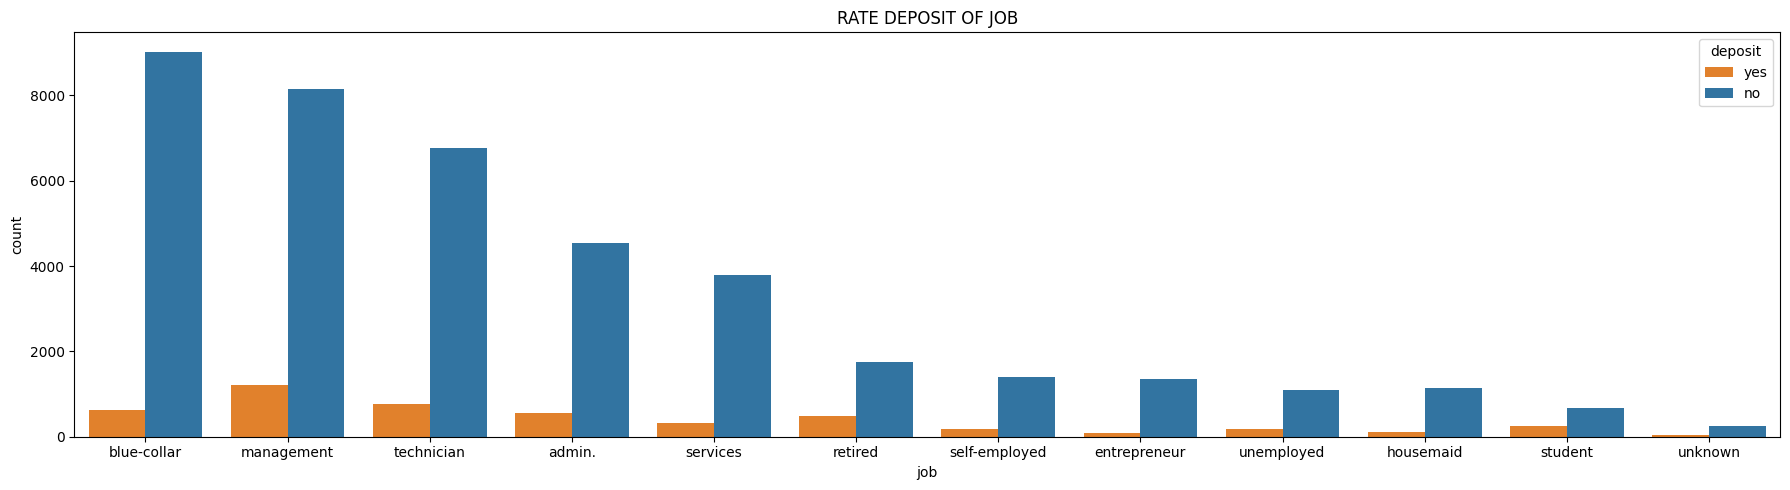

In [ ]:
plt.figure(figsize=(18,5))
custom_palette = ['#ff7f0e', '#1f77b4']
sns.countplot(x = 'job', hue='deposit', data=df, order=df['job'].value_counts().index, palette = custom_palette)
plt.xlabel('job')
plt.title('RATE DEPOSIT OF JOB')
plt.tight_layout()

JOB
* The histogram of job categories of bank customers shows that the bank targets more customers in job categories such as management, blue-collar, technician, admin, and services, while contacting fewer customers in job categories such as entrepreneurs, self-employed, unemployed, students, and housemaids. However, it is interesting to note that the customers in job categories of students and retired show a higher ratio of subscribing to term deposit compared to other job categories.

* The bank should focus more on job categories such as students and retired to increase the subscription rate.

MONTH
* We can observe that the subscription rate is low during the months of September, October, December, January, and March and the number of customer contacts is also low during these months. However, the subscription rate is relatively good compared to the number of customer contacts during these months. Therefore, to improve the subscription rate we can focus on increasing the number of customer contacts during these months and encourage them to subscribe to the term deposit.

* The subscription rate for the other months, it can be seen that the subscription rate is low overall, regardless of the number of contacts made. This indicates that the bank needs to improve its marketing strategy and promotion of term deposit subscription to attract more customers.

HOUSING, DEFAULT, LOAN
* Customers who do not have any personal, housing loan or credit default have a higher ratio of subscribing to term deposit compared to those who have loans or credit defaults.

EDUCATION
* In the education column, the percentage of customers who subscribed to term deposits is higher for those in the secondary and tertiary education categories. This suggests that the bank should focus more on customers in these categories.

MARITAL
* In the marital column there is no clear pattern in the subscription ratio. However the bank should focus more on married and single customers who are students. This is because we observed in the previous chart that students have a higher subscription ratio in the job column.

POUTCOME
* In the poutcome column we clearly see that customers who subscribed to term deposits in the previous marketing campaign are more likely to subscribe again. This indicates a high chance of success in targeting these customers.

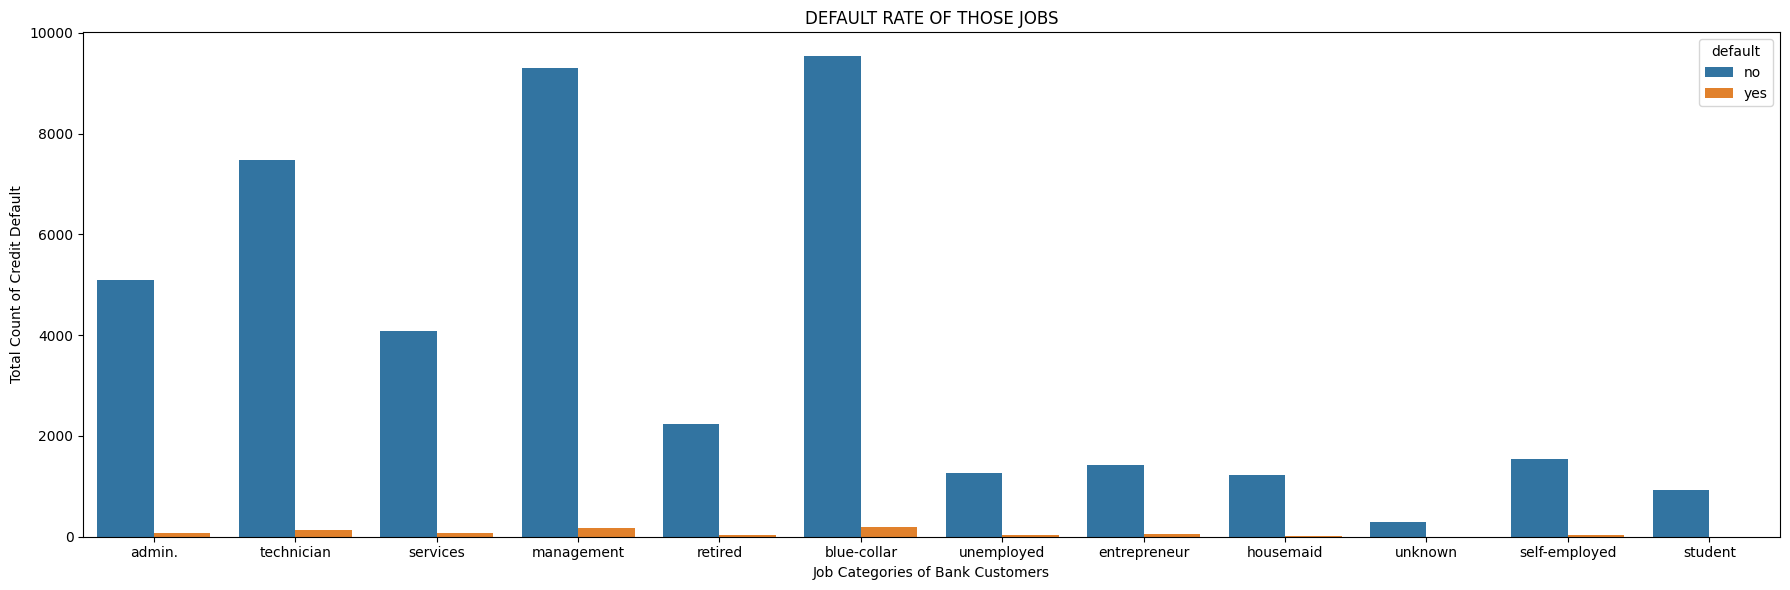

In [ ]:
plt.figure(figsize=(18,6))

sns.countplot(x='job', hue='default', data=df)
plt.xlabel('Job Categories of Bank Customers', color='black')
plt.ylabel('Total Count of Credit Default', color='black')
plt.title('DEFAULT RATE OF THOSE JOBS')
plt.tight_layout()
plt.show()

* Based on the previous analysis it can be observed that student and retired customers have a higher likelihood of subscribing to term deposits. This could be due to the fact that they have a lower number of credit defaults as well as potentially having more available time and resources to consider long-term investments.

* It is important for the bank to focus on customers in certain job categories such as blue-collar, admin, management, and services. These categories have shown a significant portion of customers subscribing to term deposits.

* It may not be a good strategy to contact customers in categories such as entrepreneur, unemployed, and self-employed as they have shown a lower likelihood of subscribing to term deposits. However it is important to note that there may be other factors such as bank balance and loan status that could also influence a customer's decision to subscribe.

##Univariate and Bivariate Analysis of numerical variables

<ipython-input-24-9cb6ea732965>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='deposit', y=col ,data=df,palette = custom_palette)
<ipython-input-24-9cb6ea732965>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='deposit', y=col ,data=df,palette = custom_palette)
<ipython-input-24-9cb6ea732965>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='deposit', y=col ,data=df,palette = custom_palette)
<ipython-input-24-9cb6ea732965>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

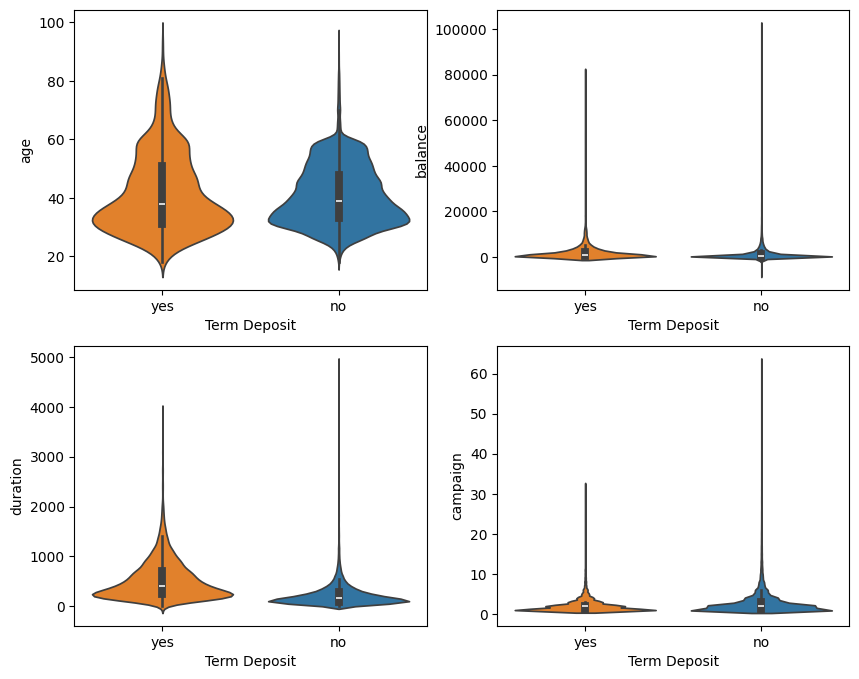

In [ ]:
# Visualizing the distribution of customers subscribed or not term deposit using a violin plot with numerical columns

columns = ['age','balance','duration','campaign']
custom_palette = ['#ff7f0e', '#1f77b4']
plt.figure(figsize=(10,8))
n=1
for col in columns:
  ax = plt.subplot(2,2,n)
  sns.violinplot(x='deposit', y=col ,data=df,palette = custom_palette)
  plt.xlabel('Term Deposit')
  n += 1
plt.show()

Age :
 * From the violin plot we can observe that customers in the age group of 20 to 30 have a higher chance of subscribing to the term deposit. However, after 60+ age there is also a high ratio of customers who subscribed. It is important to note that the number of customers contacted in the 60+ age group is less which could be a factor in the observed trend.

Balance :
 * The distribution of balance suggests that customers with less balance are less likely to subscribe to the term deposit.

Duration :
 * We can see that when the duration of the last contact made with the customer is higher there is a very high chance that the customer subscribed to the term deposit.

Campaign :
 * From the violin plot, we can observe that customers who were contacted 5 or fewer times during the current marketing campaign are more likely to subscribe to the term deposit.

These observations suggest that age, balance, duration, and campaign are important factors in determining whether a customer will subscribe to the term deposit.

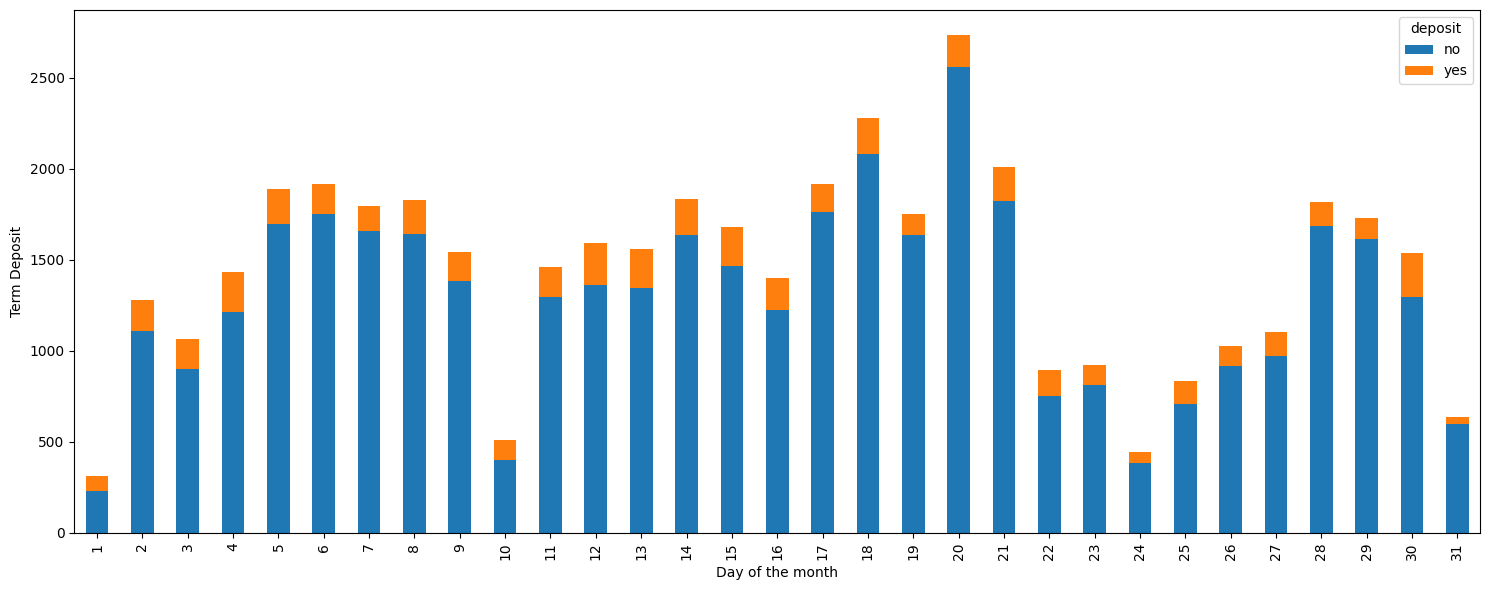

In [ ]:
# find out which day of the month was the client contacted more

types = df.groupby("day")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True', xlabel=('Day of the month'), ylabel=('Term Deposit'), figsize=(15,6))
plt.tight_layout()
plt.show()

* The larger number of clients were contacted during the middle of the month. However the ratio of term deposits remained relatively consistent throughout the days of the month except for the last day (day 30), which had a slightly higher chance of customers subscribing to term deposits.
* Therefore it would be beneficial for the bank to focus more on the last day of the month for contacting customers. This could be due to various reasons such as customers being more willing to invest towards the end of the month when they have a better understanding of their monthly budget or the bank having better offers or incentives towards the end of the month to encourage customers to invest in term deposits.

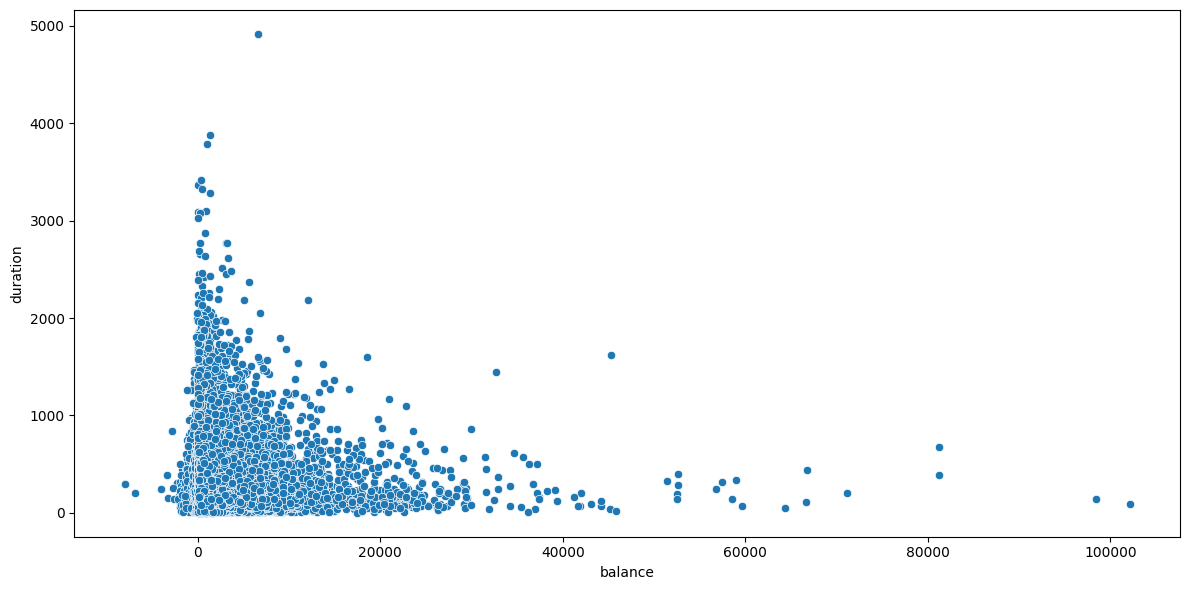

In [ ]:
# checking the corr. of balance and duration column

plt.figure(figsize=(12,6))

sns.scatterplot(x='balance', y='duration', data=df)
plt.tight_layout()
plt.show()

From the scatter plot, we can observe that customers with a low or zero bank balance are contacted more frequently by the bank. This strategy may not be the most effective as customers with low balance have a higher ratio of non-subscribed term deposit. Hence the bank should focus on medium and high bank balance customers when contacting them to increase the likelihood of a positive outcome.

# Model predict

## Preprocessing

In [ ]:
#Label coding
df['education'].replace(['unknown','primary','secondary','tertiary'],[0,1,2,3], inplace = True)
df['default'].replace(['no','yes'],[0,1], inplace = True)
df['housing'].replace(['no','yes'],[0,1], inplace = True)
df['loan'].replace(['no','yes'],[0,1], inplace = True)
df['deposit'].replace(['no','yes'],[0,1], inplace = True)



In [ ]:
#Onehot
df = pd.get_dummies(df,columns=['job','marital','contact','month','poutcome']).astype('int')

In [ ]:
#scaler
std_columns = ['age','balance','day','duration', 'campaign', 'pdays','previous']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[std_columns] = scaler.fit_transform(df[std_columns])
df[std_columns]

,age,balance,day,duration,campaign,pdays,previous
0,1.704193,0.315289,-1.299381,3.134637,-0.569068,-0.410513,-0.250250
1,1.421252,-0.436295,-1.299381,4.824482,-0.569068,-0.410513,-0.250250
2,0.006546,-0.035646,-1.299381,4.514346,-0.569068,-0.410513,-0.250250
3,1.326938,0.358788,-1.299381,1.293700,-0.569068,-0.410513,-0.250250
4,1.232624,-0.390834,-1.299381,1.667454,-0.247170,-0.410513,-0.250250
...,...,...,...,...,...,...,...
56356,1.704193,-0.405879,0.022834,-0.364336,-0.247170,1.471098,1.919059
56360,-0.370709,0.016029,0.022834,0.315578,-0.247170,-0.410513,-0.250250
56361,-0.653650,0.031401,0.022834,3.627674,0.074727,4.904038,4.956092
56371,1.515566,-0.232537,0.143035,1.011396,0.396624,-0.410513,-0.250250


In [ ]:
df.shape

(44709, 46)

In [ ]:
X = df.drop(columns = 'deposit')
y = df['deposit']

##SMOTE

In [ ]:
#Before SMOTE
model = LogisticRegression()
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size= 0.25, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('\n classification report: \n', classification_report(y_test, y_pred))


 classification report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9928
           1       0.65      0.31      0.42      1250

    accuracy                           0.90     11178
   macro avg       0.79      0.65      0.69     11178
weighted avg       0.89      0.90      0.89     11178



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#After SMOTE
model = LogisticRegression()
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size= 0.25, random_state = 42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)
print('\n classification report: \n', classification_report(y_test, y_pred))


 classification report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      9928
           1       0.53      0.57      0.55      1250

    accuracy                           0.89     11178
   macro avg       0.74      0.75      0.74     11178
weighted avg       0.90      0.89      0.90     11178



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We focus on layer 1 which is the layer to predict customer deposits. After SMOTE, layer 1 recall has improved efficiency.

=> We decided to SMOTE

##GridSearchCV model

In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GridSearchCV(RandomForestClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(KNeighborsClassifier(), param_grid={
        'n_neighbors': [10 ,50, 100, 200],
    }),
    GridSearchCV(AdaBoostClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(GradientBoostingClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(LGBMClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(XGBClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
]

In [ ]:
for model in models:
    _model = model
    _model.fit(X_train_smote, y_train_smote)
    pred = _model.predict(X_test)
    print('='*50)
    print(_model)
    try:
        print(f"BEST PARAM: {_model.best_params_}")
    except:
        pass
    print(classification_report(y_test, pred))
    print('='*50)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9928
           1       0.53      0.57      0.55      1250

    accuracy                           0.89     11178
   macro avg       0.74      0.75      0.74     11178
weighted avg       0.90      0.89      0.90     11178

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      9928
           1       0.45      0.56      0.50      1250

    accuracy                           0.88     11178
   macro avg       0.70      0.74      0.72     11178
weighted avg       0.89      0.88      0.88     11178

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9928
           1       0.57      0.62      0.59   

#Conclusion

Chọn model AdaBoostClassfier:

* Recall cao thứ hai: 0.75

* Precision cao thứ hai: 0.51

* F1-score cao nhất: 0.63